## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `Importing` Dataset:

In [2]:
january=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/JANUARY-2021.csv")
february=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/FEBRUARY-2021.csv")
march=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/MARCH-2021.csv")
april=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/APRIL-2021.csv")
may=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/MAY-2021.csv")
june=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/JUNE-2021.csv")
july=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/JULY-2021.csv")
august=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/AUGUST-2021.csv")
september=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/SEPTEMBER-2021.csv")
october=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/OCTOBER-2021.csv")
november=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/NOVEMBER-2021.csv")
december=pd.read_csv("/Users/anshika/Downloads/workshop training/traning project/DECEMBER-2021.csv")

In [3]:
df=pd.concat([january,february,march,april,may,june,july,august,september,october,november,december], axis=0)   

In [4]:
df.shape

(22369, 78)

## `Data Cleaning`:

### Required Columns:

In [5]:
df=df[['Invoice Number', 'Invoice Date','Transaction Type','Order Id', 'Shipment Id', 'Shipment Date', 'Order Date',
       'Shipment Item Id', 'Quantity', 'Item Description', 'Asin', 'Hsn/sac',
       'Sku', 'Product Tax Code','Ship To City', 'Ship To State','Invoice Amount','Payment Method Code','Total Tax Amount']]

### Column Names in Lower Case:

In [6]:
df .columns = [x.lower() for x in df.columns]              
df = df.apply(lambda x: x.astype(str).str.lower())

In [7]:
df.columns

Index(['invoice number', 'invoice date', 'transaction type', 'order id',
       'shipment id', 'shipment date', 'order date', 'shipment item id',
       'quantity', 'item description', 'asin', 'hsn/sac', 'sku',
       'product tax code', 'ship to city', 'ship to state', 'invoice amount',
       'payment method code', 'total tax amount'],
      dtype='object')

In [8]:
df.head()

,invoice number,invoice date,transaction type,order id,shipment id,shipment date,order date,shipment item id,quantity,item description,asin,hsn/sac,sku,product tax code,ship to city,ship to state,invoice amount,payment method code,total tax amount
0,in-688,2020-12-23 09:16:31,refund,405-6906592-3545154,13944360394039,2020-12-26 11:33:05,2020-12-23 08:48:49,268742343161.0,1,the monument shop kedarnath temple miniature r...,b08nzq922r,nan,kedarnath temple,a_gen_standard,darbhanga,bihar,-299.0,cod,-45.61
1,in-715,2020-12-24 21:28:08,refund,406-2676059-6035527,13302460170039,2020-12-27 10:46:08,2020-12-24 20:59:41,268748313414.0,1,the monument shop baba mahakal sampoorn swaroo...,b08pp95plv,nan,fmk set,a_gen_standard,banswara,rajasthan,-1100.0,cod,-167.8
2,in-769,2020-12-28 22:02:20,refund,405-7039814-7152300,13741556717039,2020-12-30 12:22:43,2020-12-28 21:32:42,268839192816.0,1,the monument shop sadhu baba handcrafted desig...,b08p12mwcg,nan,sadhu baba,a_gen_standard,gurugram,haryana,-199.0,cod,-30.36
3,in-754,2020-12-27 21:54:59,refund,403-9739410-9827508,13952486356039,2020-12-29 13:31:35,2020-12-27 21:24:53,268814584956.0,1,the monument shop independance day and republi...,b08q23ks8y,nan,republic set,a_gen_standard,surat,gujarat,-699.0,cod,-106.63
4,in-804,2020-12-31 14:13:57,mfnshipment,404-2599161-0163525,13982581546039,2021-01-04 11:43:56,2020-12-31 13:38:36,272298891225.0,1,the monument shop kedarnath temple miniature r...,b08nzq922r,nan,kedarnath temple,a_gen_standard,bhavnagar,gujarat,299.0,cod,45.61


## Data Typing & Extracting Date & Month:

In [9]:
df['invoice date'] = df['invoice date'].astype('datetime64[ns]')   
df['invoice date']= df['invoice date'].dt.date
df['invoice date'] 

0       2020-12-23
1       2020-12-24
2       2020-12-28
3       2020-12-27
4       2020-12-31
           ...    
1841    2021-11-24
1842    2021-11-27
1843    2021-11-26
1844    2021-11-28
1845    2021-10-16
Name: invoice date, Length: 22369, dtype: object

In [10]:
df['order date']=df['order date'].astype('datetime64[ns]') ## Data typing and extracting date and month
df['month of order']=df['order date'].dt.month
df['order date']=df['order date'].dt.date
df['order date']

0       2020-12-23
1       2020-12-24
2       2020-12-28
3       2020-12-27
4       2020-12-31
           ...    
1841    2021-11-24
1842    2021-11-27
1843    2021-11-26
1844    2021-11-28
1845    2021-10-16
Name: order date, Length: 22369, dtype: object

## `Mapping` the Month as their Respective Name:

In [11]:

df["month of order"]=df["month of order"].map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})

In [12]:
df['shipment date']=df['shipment date'].astype('datetime64[ns]')
df['shipment date']=df['shipment date'].dt.date
df['shipment date'] 

0       2020-12-26
1       2020-12-27
2       2020-12-30
3       2020-12-29
4       2021-01-04
           ...    
1841    2021-11-25
1842    2021-11-28
1843    2021-11-27
1844    2021-11-29
1845    2021-10-17
Name: shipment date, Length: 22369, dtype: object

In [13]:
df["quantity"]=df["quantity"].astype("int")
df["invoice amount"]=df["invoice amount"].astype("float")

## `Replacing` string "nan" to proper Null Values:

In [14]:
df['item description']=df['item description'].replace('nan', np.NaN)    ## Replacing string 'nan" to proper null values

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22369 entries, 0 to 1845
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   invoice number       22369 non-null  object 
 1   invoice date         22369 non-null  object 
 2   transaction type     22369 non-null  object 
 3   order id             22369 non-null  object 
 4   shipment id          22369 non-null  object 
 5   shipment date        18026 non-null  object 
 6   order date           18026 non-null  object 
 7   shipment item id     22369 non-null  object 
 8   quantity             22369 non-null  int64  
 9   item description     18026 non-null  object 
 10  asin                 22369 non-null  object 
 11  hsn/sac              22369 non-null  object 
 12  sku                  22369 non-null  object 
 13  product tax code     22369 non-null  object 
 14  ship to city         22369 non-null  object 
 15  ship to state        22369 non-null  

### `df_cancel` is the data frame with only Cancelled Products:

In [16]:
df_cancel=df[df[['item description']].isna().all(1)]

In [17]:
df_cancel["order id"].value_counts()

407-5552185-1024348    9
403-7857651-4666723    9
404-3411235-8253166    8
402-0007201-5633944    7
402-9367000-5002702    7
                      ..
404-4760880-3638750    1
406-2940815-0276300    1
406-5648059-7361938    1
405-2383467-4832365    1
403-5006208-4326724    1
Name: order id, Length: 3203, dtype: int64

## `Renaming` the Columns:

In [18]:
df.rename(columns = {'order id':'order_id','shipment id':'shipment_id',
                     'shipment item id':'shipment_item_id',
                    'order date':'order_date',
                    'payment method code':'payment_method_code',
                    'month of order':'month_of_order',
                    'total tax amount':'total_tax_amount',
                    'invoice amount':'invoice_amount',
                    'ship to state':'ship_to_state',
                    'ship to city':'ship_to_city',
                    'product tax code':'product_tax_code',
                    'item description':'item_description',
                    'shipment date':'shipment_date',
                    'invoice number':'invoice_number',
                    'invoice date':'invoice_date',
                    'transaction type':'transaction_type'}, inplace = True)

In [19]:
df_cancel.rename(columns = {'shipment id':'shipment_id','order id':'order_id'
                     ,'shipment item id':'shipment_item_id',
                    'order date':'order_date',
                    'payment method code':'payment_method_code',
                    'month of order':'month_of_order',
                    'total tax amount':'total_tax_amount',
                    'invoice amount':'invoice_amount',
                    'ship to state':'ship_to_state',
                    'ship to city':'ship_to_city',
                    'product tax code':'product_tax_code',
                    'item description':'item_description',
                    'shipment date':'shipment_date',
                    'invoice number':'invoice_number',
                    'invoice date':'invoice_date',
                    'transaction type':'transaction_type'}, inplace = True)

/var/folders/jw/n6118q9s073_cslq46brdks40000gn/T/ipykernel_2600/2044782914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancel.rename(columns = {'shipment id':'shipment_id','order id':'order_id'


# DATA VISUALIZATION:

###  1. MOST SOLD ITEMS:

In [20]:
skugroup = df["item_description"].unique()
len(skugroup)

149

In [21]:
most_sold = df.loc[:,['sku','item_description','quantity','order_id']]
most_sold.head(10)

,sku,item_description,quantity,order_id
0,kedarnath temple,the monument shop kedarnath temple miniature r...,1,405-6906592-3545154
1,fmk set,the monument shop baba mahakal sampoorn swaroo...,1,406-2676059-6035527
2,sadhu baba,the monument shop sadhu baba handcrafted desig...,1,405-7039814-7152300
3,republic set,the monument shop independance day and republi...,1,403-9739410-9827508
4,kedarnath temple,the monument shop kedarnath temple miniature r...,1,404-2599161-0163525
5,maa m,the monument shop mata vaishno devi darbar me...,1,402-1549081-7394709
6,fmk set,the monument shop baba mahakal sampoorn swaroo...,2,406-3412197-9393907
7,maa m,the monument shop mata vaishno devi darbar me...,1,403-3584969-8845103
8,tms01,the monument shop mata vaishno devi figurine h...,1,171-4492455-5238710
9,shmk acr,the monument shop baba mahakal shringar swaroo...,1,404-3592142-2483531


## Pivot table

In [22]:
sold = pd.pivot_table(df, index="sku", values="order_id",aggfunc="count").sort_values(by="order_id",ascending=False).head(10)
sold

,order_id
sku,
chocolate set,3100
maa m,1442
shmk,1319
ovc ice cream set,1164
chocolate-set,1018
3 sweets set,777
samosa food,738
tms01,710
happy meal,453


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'chocolate set'),
  Text(1, 0, 'maa m '),
  Text(2, 0, 'shmk'),
  Text(3, 0, 'ovc ice cream set'),
  Text(4, 0, 'chocolate-set'),
  Text(5, 0, '3 sweets set'),
  Text(6, 0, 'samosa food'),
  Text(7, 0, 'tms01'),
  Text(8, 0, 'happy meal'),
  Text(9, 0, 'khatu shyam')])

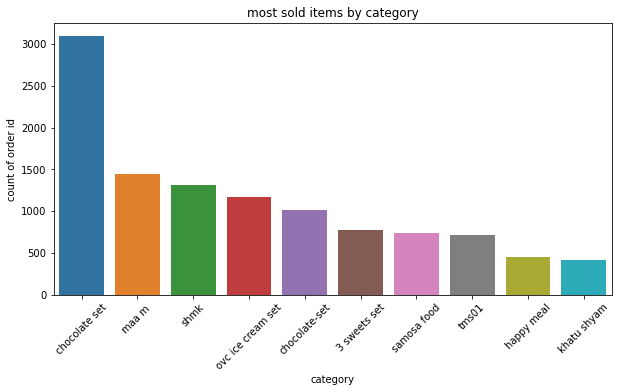

In [23]:
plt.figure(figsize=(10,5))
plt.title('most sold items by category')
sns.barplot(x=sold.index,y=sold["order_id"])
plt.xlabel("category")
plt.ylabel("count of order id")
plt.xticks(rotation=45)

### 2. TOP 10 MOST CANCELLED ITEMS:

Text(0.5, 1.0, 'Top 10 most cancelled items')

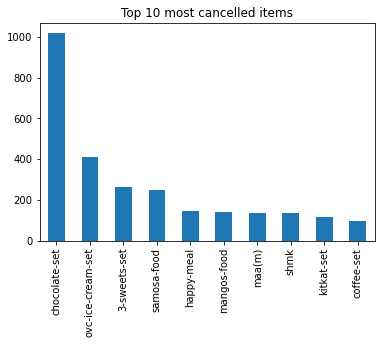

In [24]:
df_cancel.sku.value_counts().head(10).plot.bar()
plt.title("Top 10 most cancelled items")


## Pivot table

In [25]:
cancelled = pd.pivot_table(df, index="transaction_type", values="order_id",aggfunc="count").sort_values(by="order_id",ascending=False).head(10)
cancelled

,order_id
transaction_type,
shipment,11145
mfnshipment,4928
cancel,4343
refund,1796
freereplacement,157


In [26]:
cancel_orders=df_cancel["order_id"]
cancel_orders

26      171-5073434-8811517
27      171-4125308-9054738
28      171-4239103-7868322
29      171-6440313-4726709
30      405-4449785-8184362
               ...         
1735    404-0872529-8649110
1736    407-3140353-9676326
1741    407-2827073-7709135
1743    408-5608764-4018762
1747    403-5006208-4326724
Name: order_id, Length: 4343, dtype: object

### Considering those records which are Generating Revenue:

In [27]:
df_no_can=df[~df["order_id"].isin(cancel_orders)] 


## Pivot table

In [28]:
revenue = pd.pivot_table(df_no_can, index="transaction_type", values="order_id",aggfunc="count").sort_values(by="order_id",ascending=False).head(10)
revenue

,order_id
transaction_type,
shipment,8121
mfnshipment,4077
refund,1514
freereplacement,157


### Creating a new Column Revenue for each item:

In [29]:
df_no_can["revenue"]=df_no_can.loc[:,"quantity"]*df_no_can.loc[:,"invoice_amount"] 


/var/folders/jw/n6118q9s073_cslq46brdks40000gn/T/ipykernel_2600/2934330297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_can["revenue"]=df_no_can.loc[:,"quantity"]*df_no_can.loc[:,"invoice_amount"]


### 3 .TOP 10 REVENUE GENERATING ITEMS:

Text(0.5, 1.0, 'top 10 revenue generating items')

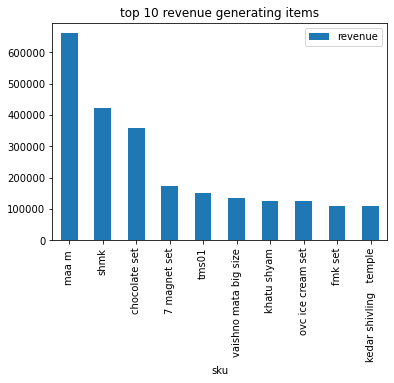

In [30]:
df_no_can.groupby(by="sku").agg({"revenue":"sum"}).sort_values(by="revenue",ascending=False).head(10).plot.bar()
plt.title("top 10 revenue generating items")


### Pivot Table to check the Number of Orders from Each State:

In [31]:
state_order=pd.pivot_table(df,index="ship_to_state",values="order_id",aggfunc="count").sort_values(by="order_id",ascending=False).head(10)
state_order

,order_id
ship_to_state,
maharashtra,3367
uttar pradesh,2720
karnataka,1941
delhi,1818
tamil nadu,1423
haryana,1403
west bengal,1378
telangana,1293
gujarat,1124


### 4 .TOP 10 STATES WITH MOST ORDERS:

<AxesSubplot:title={'center':'Top 10 states with most orders'}, xlabel='ship_to_state', ylabel='order_id'>

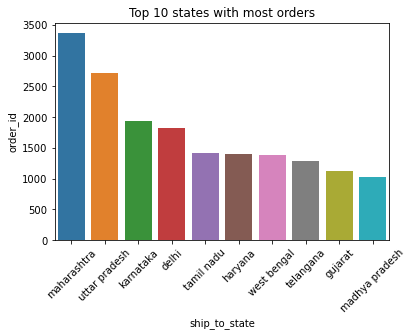

In [32]:
plt.title("Top 10 states with most orders")
plt.xticks(rotation=45)
sns.barplot(x=state_order.index,y=state_order["order_id"])


## Pivot table

In [33]:
state_order =pd.pivot_table(df,index="ship_to_state",values="order_id",aggfunc="count").sort_values(by="order_id",ascending=False).head(10)
state_order


,order_id
ship_to_state,
maharashtra,3367
uttar pradesh,2720
karnataka,1941
delhi,1818
tamil nadu,1423
haryana,1403
west bengal,1378
telangana,1293
gujarat,1124


## 5. TOP 10 CITY WITH MOST ORDERS:

<AxesSubplot:title={'center':'Top 10 city with most orders'}, xlabel='ship_to_city', ylabel='order_id'>

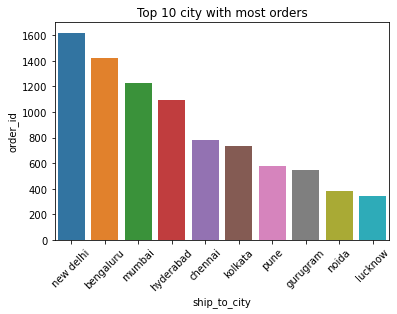

In [47]:
plt.title("Top 10 city with most orders")
plt.xticks(rotation=45)
sns.barplot(x=city_order.index,y=city_order["order_id"])


### Pivot Table to check the Number of Orders from each City:

In [46]:
city_order=pd.pivot_table(df,index="ship_to_city",values="order_id",aggfunc="count").sort_values(by="order_id",ascending=False).head(10)
city_order


,order_id
ship_to_city,
new delhi,1620
bengaluru,1423
mumbai,1228
hyderabad,1095
chennai,781
kolkata,734
pune,581
gurugram,549
noida,383


## 6. MONTHLY SALE:

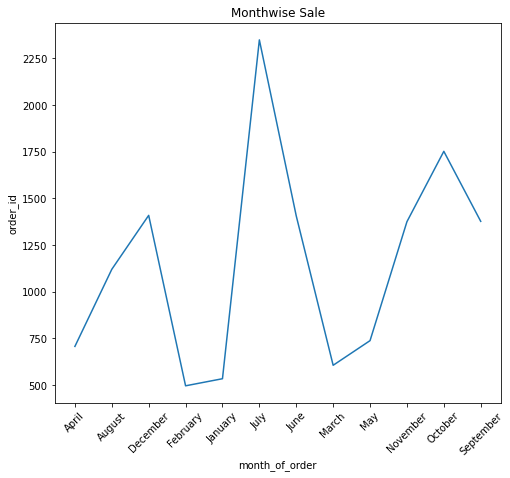

In [41]:
plt.figure(figsize=(8,7))
plt.title("Monthwise Sale")
sns.lineplot(x= monthly_sales.index,y=monthly_sales["order_id"])
plt.xticks(rotation=45)
plt.show()


## Pivot table

In [36]:
monthly_sales=pd.pivot_table(df_no_can,index="month_of_order",values=["order_id"],aggfunc=({"order_id":"count"}))
monthly_sales


,order_id
month_of_order,
April,707
August,1120
December,1409
February,496
January,534
July,2349
June,1406
March,606
May,738


## 7. MONTHWISE REVENUE GENERATED:

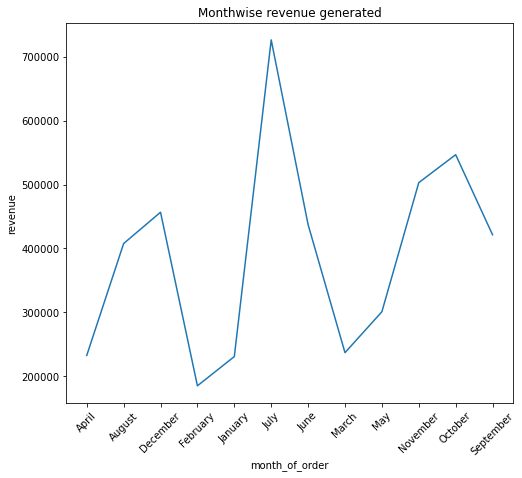

In [40]:
plt.figure(figsize=(8,7))
plt.title("Monthwise revenue generated")
sns.lineplot(x=monthly_sales_revenue.index,y= monthly_sales_revenue["revenue"])
plt.xticks(rotation=45)
plt.show()

### Pivot Table has two columns as Count of Orders and Total Revenue:

In [42]:
monthly_sales_revenue=pd.pivot_table(df_no_can,index="month_of_order",values=["order_id","revenue"],aggfunc=({"order_id":"count","revenue":"sum"}))
monthly_sales_revenue


,order_id,revenue
month_of_order,,
April,707,232739.0
August,1120,407748.0
December,1409,456739.6
February,496,185189.0
January,534,230927.0
July,2349,726336.0
June,1406,437357.0
March,606,237041.0
May,738,301056.0


## 8. TAX AMOUNT PAID PER MONTH:

In [43]:
df['total_tax_amount']=df['total_tax_amount'].astype(float)

In [44]:
tax_paid_per_month=df.groupby('month_of_order')['total_tax_amount'].sum()
tax_paid_per_month

month_of_order
April         36135.63
August        59859.21
December      65120.75
February      29048.26
January       33189.64
July         109874.55
June          73086.57
March         32922.75
May           35627.18
November      67913.19
October       88616.82
September     71698.29
Name: total_tax_amount, dtype: float64

Text(0, 0.5, 'total_tax_amount')

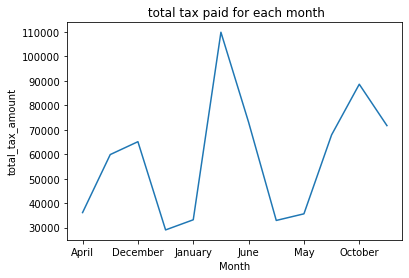

In [45]:
tax_paid_per_month.plot();

plt.title(' total tax paid for each month')
plt.xlabel("Month")
plt.ylabel("total_tax_amount")